# Exploratory Data Analysis in Python

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initial exploration

EDA is the process of reviewing and cleaning data to:
- derive insights
- generate hypotheses

In [2]:
books = pd.read_csv("databases/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


For checking NaN

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [4]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

For summary statistics

In [5]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


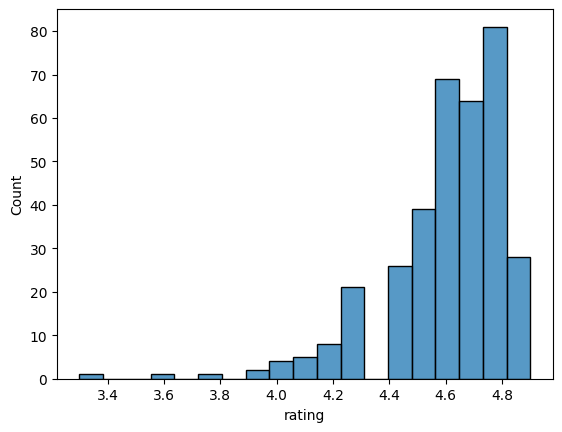

In [6]:
sns.histplot(data=books, x="rating")
plt.show()

## Data Validation

To get data types

In [7]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

We see that year is an int as it shoud be, but if it was saved as a float we could have converted it into integer:

In [8]:
books["year"] = books["year"].astype(int)

Validating categorical data

In [9]:
books["genre"].isin(["Fiction", "Non Fiction"])
#Returns True if the value is in the list and False if it isn't

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

To reverse this process and return False if the value is in the list we use ```~```:

In [10]:
~books["genre"].isin(["Fiction", "Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

Filtering the data to only those values which are in our list

In [11]:
books[books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


**Remember that we have to pass into ```isin()``` a list, even if we have a single value**

To select and view only numeric columns

In [28]:
books.select_dtypes("number").head() #number displays both int and float

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [29]:
books.select_dtypes("object").head()

,name,author,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Childrens


Checking max and min values

In [13]:
print(books["year"].max())
print(books["year"].min())

2019
2009


Visualizing

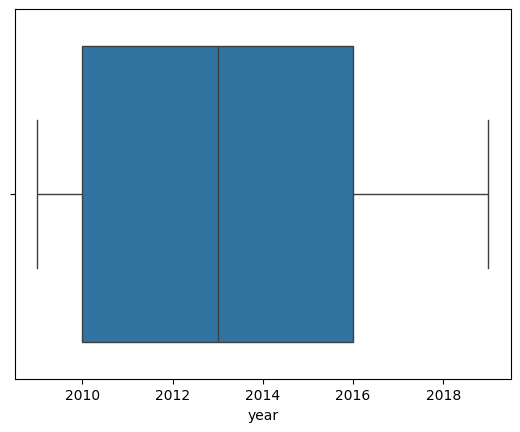

In [14]:
sns.boxplot(data=books, x="year")
plt.show()

The 25th and 75th percentile are 2010 and 2016 respectively and the median year is 2013

We can also highlight different genres

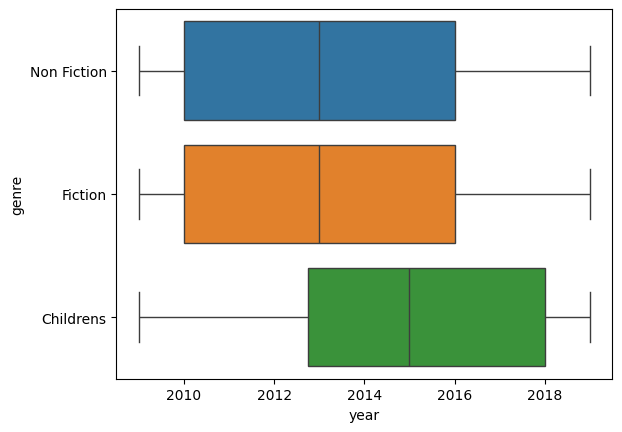

In [15]:
sns.boxplot(data=books, x="year", y="genre", hue="genre")
plt.show()

## Data summarization

In [17]:
books.groupby("genre")[["rating", "year"]].mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


- ```.sum()```
- ```.count()```
- ```.min()```
- ```.max()```
- ```.var()```
- ```.std()```

```.agg()``` applies aggregating functions across a DataFrame

In [19]:
books[["rating", "year"]].agg(["mean", "std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


Specifying which aggregations should be applied to which column

In [20]:
books.agg({"rating": ["mean", "std"], "year": ["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


**Named summary columns:**

each names tuple should include a column name (```ratings```) followed by an aggregating function to apply to that column (```mean```), the name of the tuple becomes the name of the resulting column

In [21]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


**Visualizing categorical summaries**

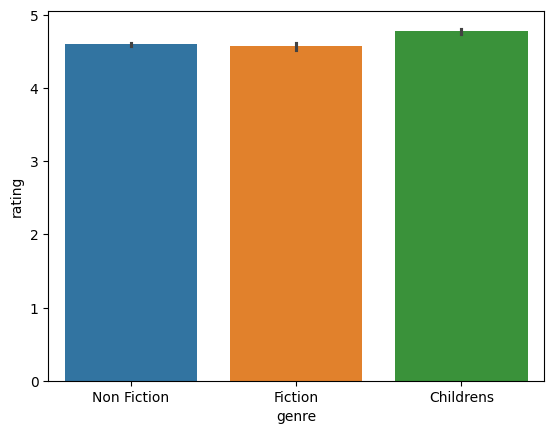

In [23]:
sns.barplot(data=books, x="genre", y="rating", hue="genre")
plt.show()

## Addressing missing data

In [30]:
salaries = pd.read_csv("databases/ds_salaries_clean.csv")

Checking for missing values (the file is clean so there is none, but they were supposed to be here)

In [31]:
print(salaries.isna().sum())

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64


**Strategies for addressing missing data:**
- drop missing values (5% or less of total)
- Impute mean, median
- Impute by sub-group (diffrent experience levels have different median salary)

We can drop data if there are smaller missing values than the threshold

In [33]:
threshold = len(salaries) * 0.05
print(threshold)

30.35


Selecing columns where less that 5% of total values are missing

In [34]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]

To drop missing columns

In [ ]:
salaries.dropna(subset=cols_to_drop, inplace=True) #inplace is needed to update the existing df

Select remaininng columns with missing values

In [35]:
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]

Imputing a summary statisics

In [37]:
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0]) #the mode is at index 0

FYI **```dropna()```** drops rows by default, but can also drop columns with **```dropna(axis=1)```** 

We haven't dealed with Salary_USD on the previous step as it is crucial to divide them by groups as salaries differ a lot

Imputing by sub-group

In [39]:
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
salaries_dict

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}

In [40]:
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(salaries["Experience"].map(salaries_dict))

The idea is that map returns such a value from a dictionary which is equal to ```salaries["Experince"]``` value (like Junior or Senior)

## Converting and analyzing categorical data


In [41]:
print(salaries.select_dtypes("object").head())

                  Designation Experience Employment_Status Employee_Location  \
0              Data Scientist        Mid                FT                DE   
1  Machine Learning Scientist     Senior                FT                JP   
2           Big Data Engineer     Senior                FT                GB   
3        Product Data Analyst        Mid                FT                HN   
4   Machine Learning Engineer     Senior                FT                US   

  Company_Size  
0            L  
1            S  
2            M  
3            S  
4            L  


Unique job Titles

In [42]:
print(salaries["Designation"].nunique())

50


We can search a column for a specific string or multiple strings (which job titles have scientist in them?)

In [44]:
salaries["Designation"].str.contains("Scientist").head()

0     True
1     True
2    False
3    False
4    False
Name: Designation, dtype: bool

In [45]:
salaries["Designation"].str.contains("Machine Learning|AI").head()

0    False
1     True
2    False
3    False
4     True
Name: Designation, dtype: bool

In [46]:
salaries["Designation"].str.contains("^Data").head() #^means that these letters should be at the start of a line

0     True
1    False
2    False
3    False
4    False
Name: Designation, dtype: bool

In [ ]:
job_categories = ["Data Science", "Data Analytics",
                  "Data Engineering", "Machine Learning",
                  "Managerial", "Consultant"]

data_science = "Data Scientist|NLP"
...

conditions = [
    (salaries["Designation"].str.contains(data_science)),
    ...
]


salaries["Job_Category"] = np.select(conditions,
                                     job_categories,
                                     default="Other")

## Working with numeric data

We assume thar dollar columns is a string, so to show the next example we have to convert it into str

In [55]:
salaries["Salary_USD"] = salaries["Salary_USD"].astype(str)

If we were to remove comas from some number like the salary, we could do it this way:

```pd.Series.str.replace("character_to_remove", "character_to_replace_them_with")```

In [53]:
salaries["Salary_USD"] = salaries["Salary_USD"].str.replace(",", "")
#Normally we would use .replace but as it is a DataSeries we use .str.replace

Converting to float

In [58]:
salaries["Salary_USD"] = salaries["Salary_USD"].astype(float)

Adding summary statistics into a DataFrame

In [68]:
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())
salaries[["Experience", "std_dev"]].value_counts()

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
Name: count, dtype: int64

Another similar example

In [70]:
salaries["median_by_comp_size"] = salaries.groupby("Company_Size") \
                                    ["Salary_USD"].transform(lambda x: x.median())

salaries[["Company_Size", "median_by_comp_size"]].value_counts()

Company_Size  median_by_comp_size
M             108076.0               326
L             95483.0                198
S             62064.0                 83
Name: count, dtype: int64

## Handling outliers

The first step on the way of finding outliers - descriptive statistics

In [71]:
salaries["Salary_USD"].describe()

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

The dots above are the **ouliers**

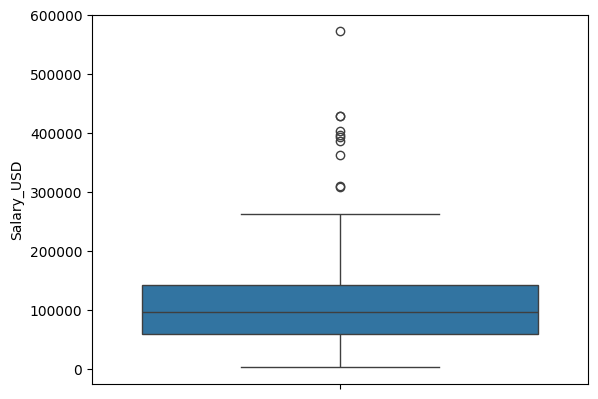

In [72]:
sns.boxplot(data=salaries,
            y="Salary_USD")
plt.show()

Upper Outlier > 75th percentile + 1.5 * IQR

Lower Outlier > 25th percentile - 1.5 * IQR

In [73]:
#75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(f"25th percentile: {seventy_fifth}")

#25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
print(f"25th percentile: {twenty_fifth}")

#Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth
print(f"IQR: {salaries_iqr}")

25th percentile: 143225.0
25th percentile: 59893.0
IQR: 83332.0


Identifying outliers

In [74]:
#Upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

#Lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)

print(upper, lower)

268223.0 -65105.0


Subsetting our data

In [78]:
no_outliers = salaries[(salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper)]
no_outliers.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,std_dev,median_by_comp_size
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,61014.876754,95483.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,55086.264071,62064.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,55086.264071,108076.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,61014.876754,62064.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,55086.264071,95483.0


In [80]:
no_outliers["Salary_USD"].describe()

count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64

Below you will first see histogram with outliers and then without

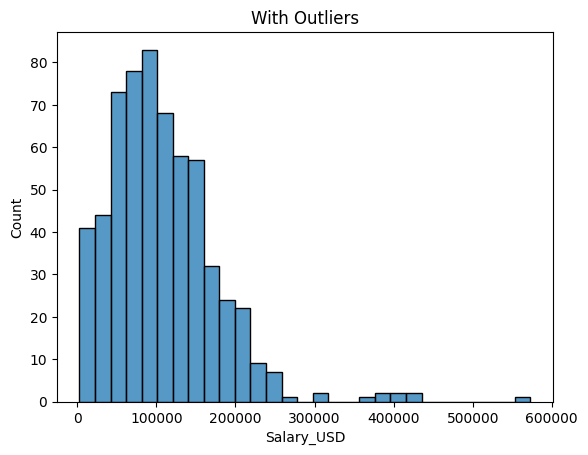

In [81]:
g = sns.histplot(data=salaries, x="Salary_USD")

g.set_title("With Outliers")
plt.show()

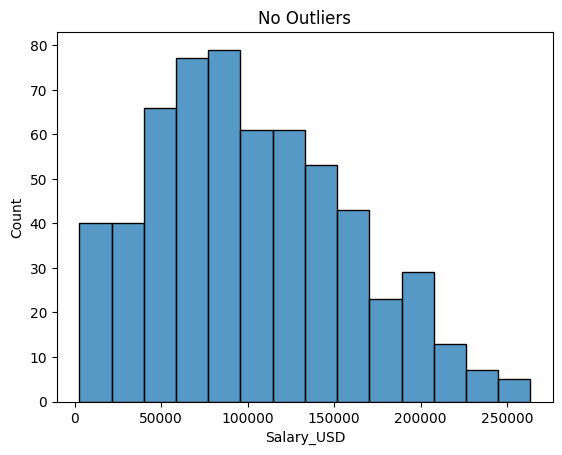

In [82]:
g = sns.histplot(data=no_outliers, x="Salary_USD")

g.set_title("No Outliers")
plt.show()